# Общее название проекта
*"Аналитика показателей сотрудников"*

## Введение  

### Обзор
О чём этот датасет:  
Данные содержат информацию о показателях сотрудников разных отделов компании по неделям.  
Задача проекта — провести исследовательский анализ и выявить закономерности в результативности сотрудников.  

**Метаданные:**  
- **employee ID** – уникальный идентификатор сотрудника  
- **department** – название отдела  
- **indicator** – тип показателя (например, производительность, KPI)  
- **16.12-22.12 ... 24.02-02.03** – значения показателей по неделям

### Допущения 
- Все значения в таблице корректные и не требуют ручной очистки.  
- Каждый сотрудник относится только к одному отделу.  
- Данные охватывают полный период анализа (с 16 декабря по 2 марта).  

### Вопросы для исследования 
Вопросы, на которые нужно ответить в рамках проекта:  
- **1:** Как изменялись показатели сотрудников по неделям?  
- **2:** Какие отделы показывают наибольший рост/спад?  
- **3:** Какие сотрудники имеют наибольшие колебания показателей? 

## Разведочный анализ данных (EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('D:/Anaconda/ТЗ аналитик.xlsx', sheet_name = 'данные')

In [7]:
df.head()

,employee ID,department,indicator,16.12-22.12,23.12-29.12,30.12-05.01,06.01-12.01,13.01-19.01,20.01-26.01,27.01-02.02,03.02-09.02,10.02-16.02,17.02-23.02,24.02-02.03
0,1696811,Отдел 1,Показатель 1,71,114.0,97.0,127.0,95.0,123.0,124.0,153.0,150.0,120.0,190.0
1,2596567,Отдел 1,Показатель 1,25,28.0,24.0,37.0,29.0,39.0,34.0,63.0,41.0,76.0,66.0
2,2966957,Отдел 1,Показатель 1,3,18.0,0.0,13.0,28.0,17.0,24.0,7.0,21.0,7.0,6.0
3,2985636,Отдел 1,Показатель 1,17,52.0,37.0,23.0,25.0,4.0,35.0,24.0,54.0,54.0,34.0
4,3022599,Отдел 1,Показатель 1,4,27.0,4.0,12.0,16.0,14.0,15.0,8.0,6.0,4.0,0.0


In [8]:
# Приведём данные в Long формат
df_long = pd.melt(
    df,
    id_vars = ['employee ID', 'department', 'indicator'],
    var_name = 'week',
    value_name = 'value'
)

In [9]:
df_long.head()

,employee ID,department,indicator,week,value
0,1696811,Отдел 1,Показатель 1,16.12-22.12,71
1,2596567,Отдел 1,Показатель 1,16.12-22.12,25
2,2966957,Отдел 1,Показатель 1,16.12-22.12,3
3,2985636,Отдел 1,Показатель 1,16.12-22.12,17
4,3022599,Отдел 1,Показатель 1,16.12-22.12,4


In [10]:
# Преобразуем колонку 'value' в числовой формат
df_long['value'] = pd.to_numeric(df_long['value'], errors='coerce')

# Извлечём день и месяц
df_long['day'] = df_long['week'].str.split('-').str[0].str.split('.').str[0].astype(int)
df_long['month'] = df_long['week'].str.split('-').str[0].str.split('.').str[1].astype(int)

# Если месяц декабрь (12), то 2024, иначе 2025
df_long['year'] = np.where(df_long['month'] == 12, 2024, 2025)

# Соберём полную дату
df_long['week_start'] = pd.to_datetime(
    df_long['day'].astype(str) + '.' + 
    df_long['month'].astype(str) + '.' + 
    df_long['year'].astype(str), 
    format='%d.%m.%Y'
)

In [11]:
df_long.head()

,employee ID,department,indicator,week,value,day,month,year,week_start
0,1696811,Отдел 1,Показатель 1,16.12-22.12,71.0,16,12,2024,2024-12-16
1,2596567,Отдел 1,Показатель 1,16.12-22.12,25.0,16,12,2024,2024-12-16
2,2966957,Отдел 1,Показатель 1,16.12-22.12,3.0,16,12,2024,2024-12-16
3,2985636,Отдел 1,Показатель 1,16.12-22.12,17.0,16,12,2024,2024-12-16
4,3022599,Отдел 1,Показатель 1,16.12-22.12,4.0,16,12,2024,2024-12-16


In [12]:
# Уберём вспомогательные колонки(day, month, year)
df_long = df_long.drop(columns = ['day', 'month', 'year'])

In [13]:
# Проверим количество пропусков по каждому столбцу
print(df_long.isnull().sum())

employee ID      0
department       0
indicator        0
week             0
value          208
week_start       0
dtype: int64


In [14]:
# Посчитаем медиану для каждой группы (отдел + показатель)
medians = df_long.groupby(['department', 'indicator'])['value'].transform('median')

# Заполним пропуски медианой
df_long['value'] = df_long['value'].fillna(medians)

In [15]:
# Проверим количество пропусков по каждому столбцу
print(df_long.isnull().sum())

employee ID    0
department     0
indicator      0
week           0
value          0
week_start     0
dtype: int64


In [16]:
df_long.head()

,employee ID,department,indicator,week,value,week_start
0,1696811,Отдел 1,Показатель 1,16.12-22.12,71.0,2024-12-16
1,2596567,Отдел 1,Показатель 1,16.12-22.12,25.0,2024-12-16
2,2966957,Отдел 1,Показатель 1,16.12-22.12,3.0,2024-12-16
3,2985636,Отдел 1,Показатель 1,16.12-22.12,17.0,2024-12-16
4,3022599,Отдел 1,Показатель 1,16.12-22.12,4.0,2024-12-16


## Расчёт средних и медианных значений по отделам и показателям

In [18]:
stats = df_long.groupby(['department', 'indicator']).agg(
    mean_value=('value', 'mean'),
    median_value=('value', 'median'),
    std_value=('value', 'std'),
    min_value=('value', 'min'),
    max_value=('value', 'max'),
    count_value=('value', 'count')
).reset_index()

stats.head()

,department,indicator,mean_value,median_value,std_value,min_value,max_value,count_value
0,Отдел 1,Показатель 1,44.345455,27.0,45.695132,0.0,190.0,55
1,Отдел 1,Показатель 2,7.400000,4.0,8.984761,0.0,42.0,55
2,Отдел 1,Показатель 3,458.054545,36.0,835.175506,0.0,2554.0,55
3,Отдел 1,Показатель 4,169.072727,17.0,314.832045,0.0,1010.0,55
4,Отдел 2,Показатель 1,57.312727,37.0,62.720592,0.0,354.0,275


##  Определение граничных значений нормы

In [20]:
def calculate_iqr_bounds(group):
    q1 = group['value'].quantile(0.25)
    q3 = group['value'].quantile(0.75)
    # межквартильный размах
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return pd.Series({'lower_bound' : lower_bound, 'upper_bound' : upper_bound})

bounds = df_long.groupby(['department', 'indicator']).apply(calculate_iqr_bounds).reset_index()

bounds.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13688\4222277428.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bounds = df_long.groupby(['department', 'indicator']).apply(calculate_iqr_bounds).reset_index()


,department,indicator,lower_bound,upper_bound
0,Отдел 1,Показатель 1,-54.00,126.00
1,Отдел 1,Показатель 2,-5.50,14.50
2,Отдел 1,Показатель 3,-246.25,427.75
3,Отдел 1,Показатель 4,-83.00,141.00
4,Отдел 2,Показатель 1,-23.25,102.75


## График распределения

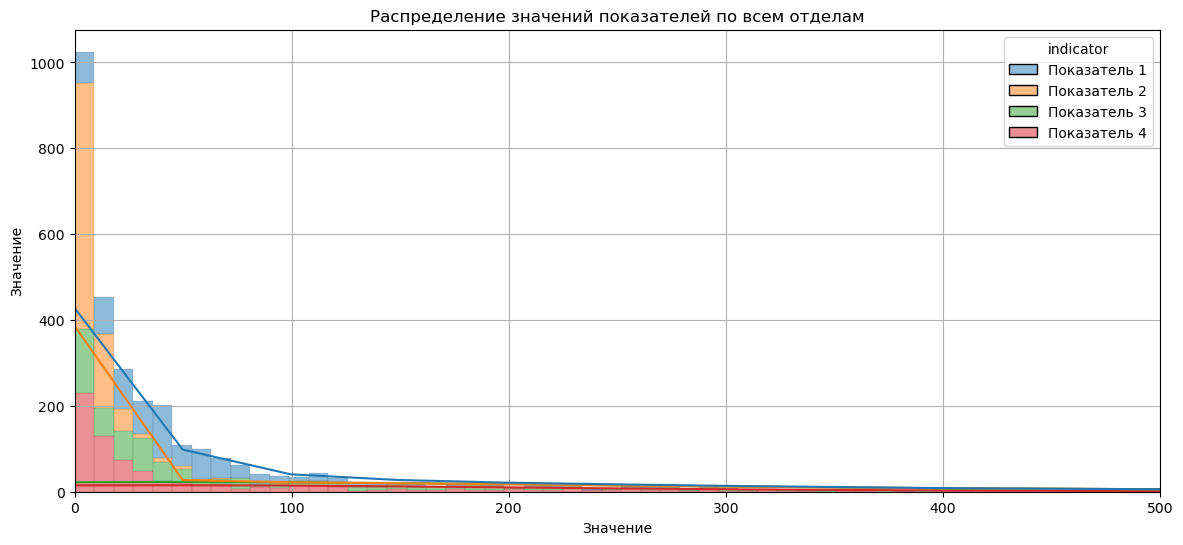

In [22]:
plt.figure(figsize=(14,6))
sns.histplot(
    data=df_long,
    x='value',
    hue='indicator',
    kde=True,
    multiple='stack'
)
plt.title('Распределение значений показателей по всем отделам')
plt.xlabel('Значение')
plt.ylabel('Значение')
plt.xlim(0, 500)
plt.grid(True)
plt.show()

## Построим Boxplot по показателям и отделам (сравнение между отделами)

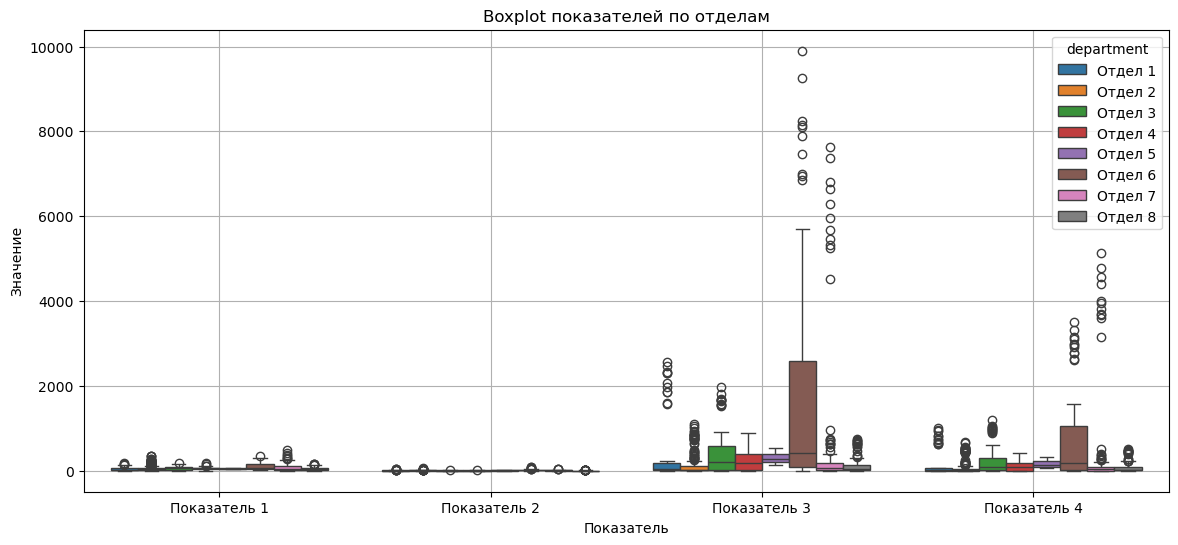

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_long,
    x='indicator',
    y='value',
    hue='department'
)
plt.title('Boxplot показателей по отделам')
plt.xlabel('Показатель')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

## Так как данные сильно отличаются по масштабу, то попробуем построить Boxplot для каждого показателя по отделам

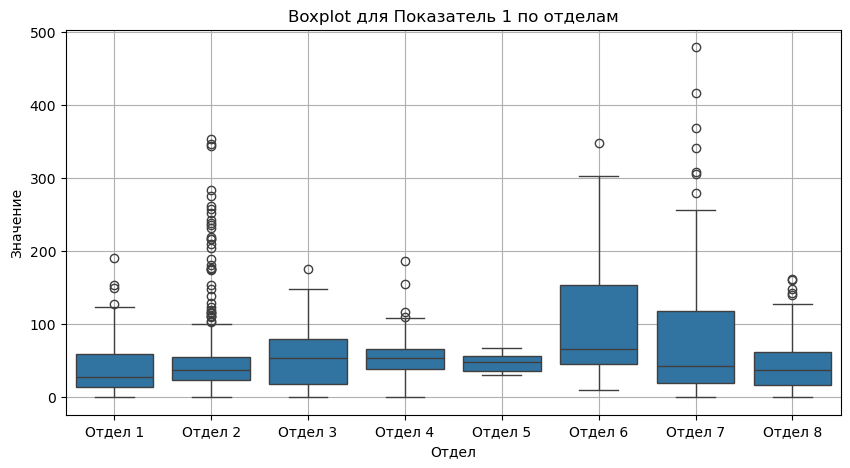

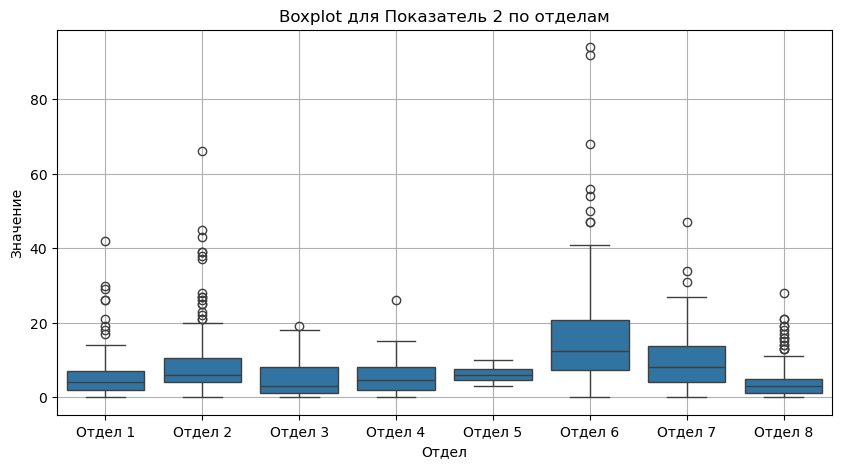

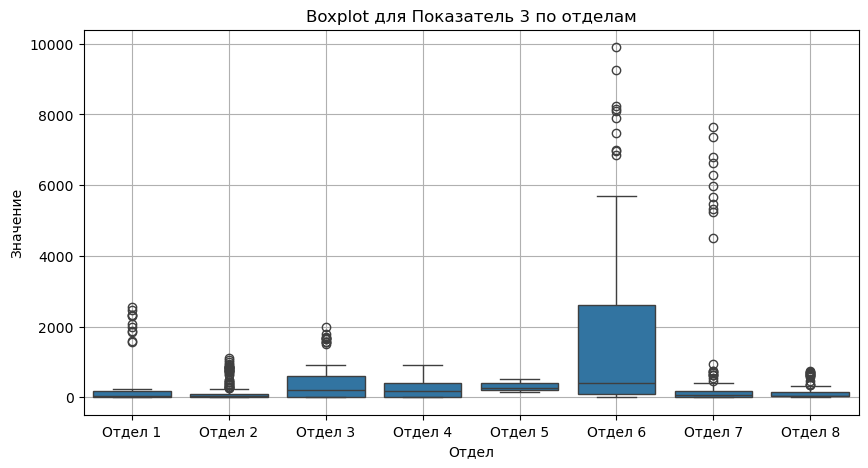

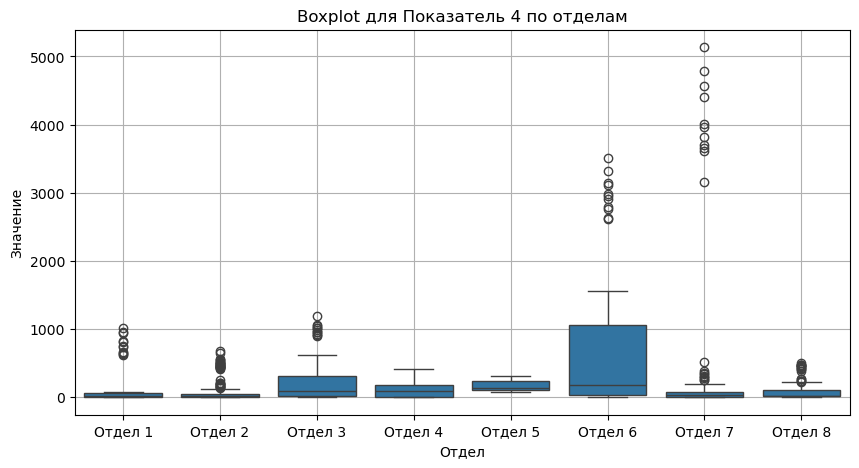

In [26]:
for indicator in df_long['indicator'].unique():
    plt.figure(figsize=(10,5))
    sns.boxplot(
        data=df_long[df_long['indicator'] == indicator],
        x='department',
        y='value'
    )
    plt.title(f'Boxplot для {indicator} по отделам')
    plt.xlabel('Отдел')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.show()

## Построим Boxplot динамики по неделям (сравнение во времени)

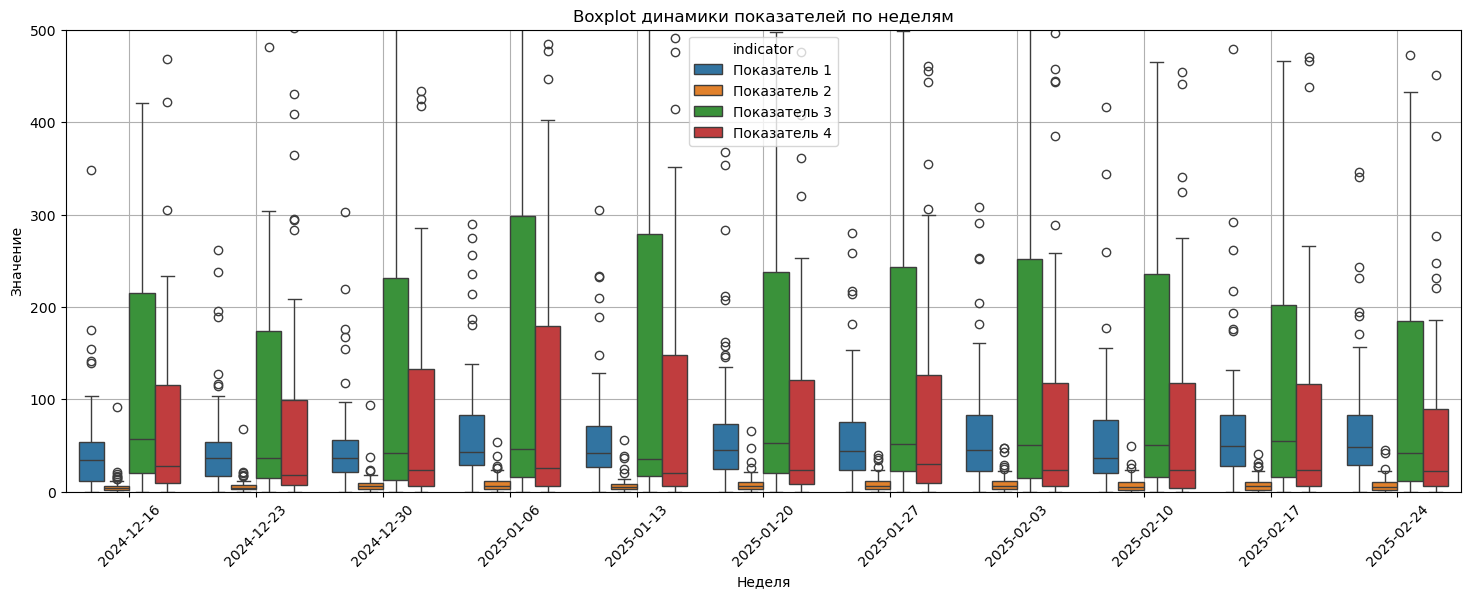

In [28]:
plt.figure(figsize=(18,6))
sns.boxplot(
    data=df_long,
    x='week_start',
    y='value',
    hue='indicator'
)
plt.title('Boxplot динамики показателей по неделям')
plt.xlabel('Неделя')
plt.ylabel('Значение')
plt.ylim(0, 500)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Так как данные снова сильно отличаются по масштабу, то попробуем логарифмировать по шкале Y

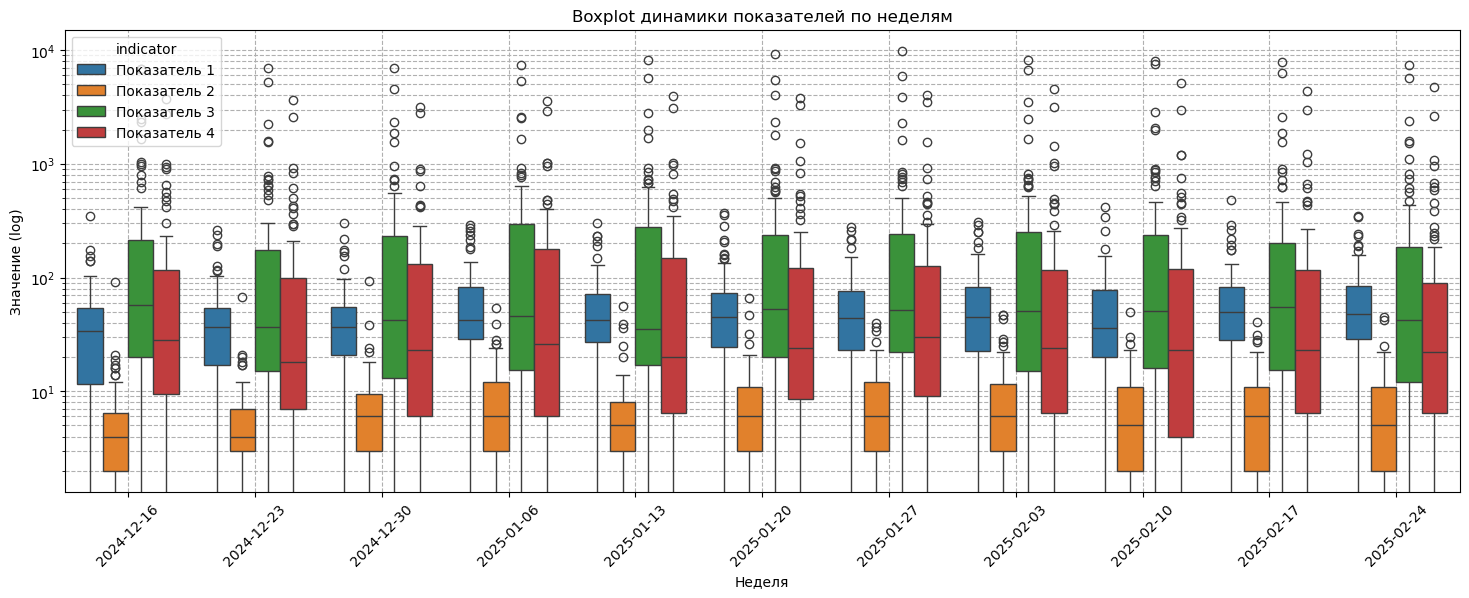

In [30]:
plt.figure(figsize=(18,6))
sns.boxplot(
    data=df_long,
    x='week_start',
    y='value',
    hue='indicator'
)
plt.title('Boxplot динамики показателей по неделям')
plt.xlabel('Неделя')
plt.ylabel('Значение (log)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle='--')
plt.show()

## Построение корреляционной матрицы

In [32]:
# Преобразуем данные в wide-формат
df_pivot = df_long.pivot_table(
    index=['employee ID', 'department', 'week_start'],
    columns='indicator',
    values='value'
).reset_index()

df_pivot.head()

indicator,employee ID,department,week_start,Показатель 1,Показатель 2,Показатель 3,Показатель 4
0,532331,Отдел 8,2024-12-16,0.0,1.0,24.0,19.0
1,532331,Отдел 8,2024-12-23,0.0,7.0,24.0,18.0
2,532331,Отдел 8,2024-12-30,0.0,6.0,29.0,24.0
3,532331,Отдел 8,2025-01-06,0.0,9.0,43.0,28.0
4,532331,Отдел 8,2025-01-13,0.0,5.0,23.0,18.0


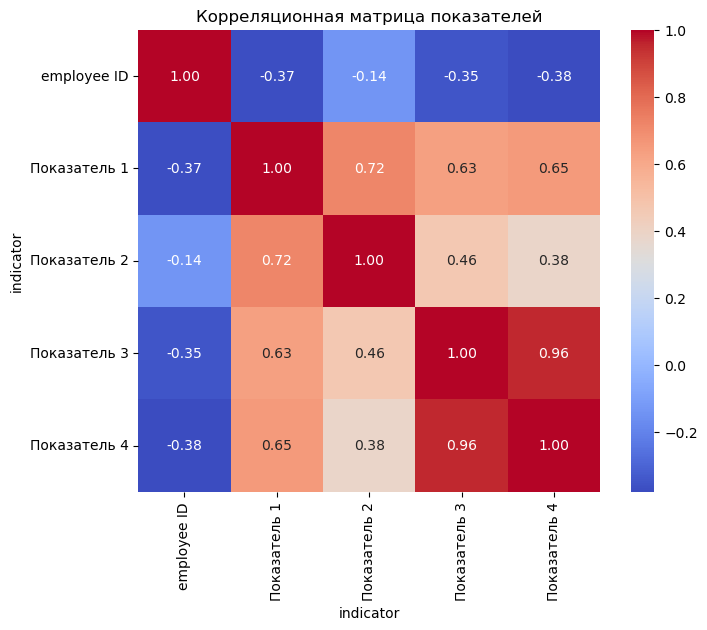

In [33]:
numeric_cols = df_pivot.select_dtypes(include='number')
# Строим корреляционную матрицу
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True
)
plt.title('Корреляционная матрица показателей')
plt.show()

# Выявление временных промежутков, в которых наблюдалось падение и рост показателей

In [35]:
# Агрегация по неделям и показателям
weekly_trends = df_long.groupby(['week_start', 'indicator']).agg(
    mean_value=('value', 'mean')
).reset_index()

weekly_trends.head()

,week_start,indicator,mean_value
0,2024-12-16,Показатель 1,42.860000
1,2024-12-16,Показатель 2,6.246667
2,2024-12-16,Показатель 3,411.913333
3,2024-12-16,Показатель 4,200.320000
4,2024-12-23,Показатель 1,47.380000


## Построение динамики по времени. График покажет: где был рост, где было падение

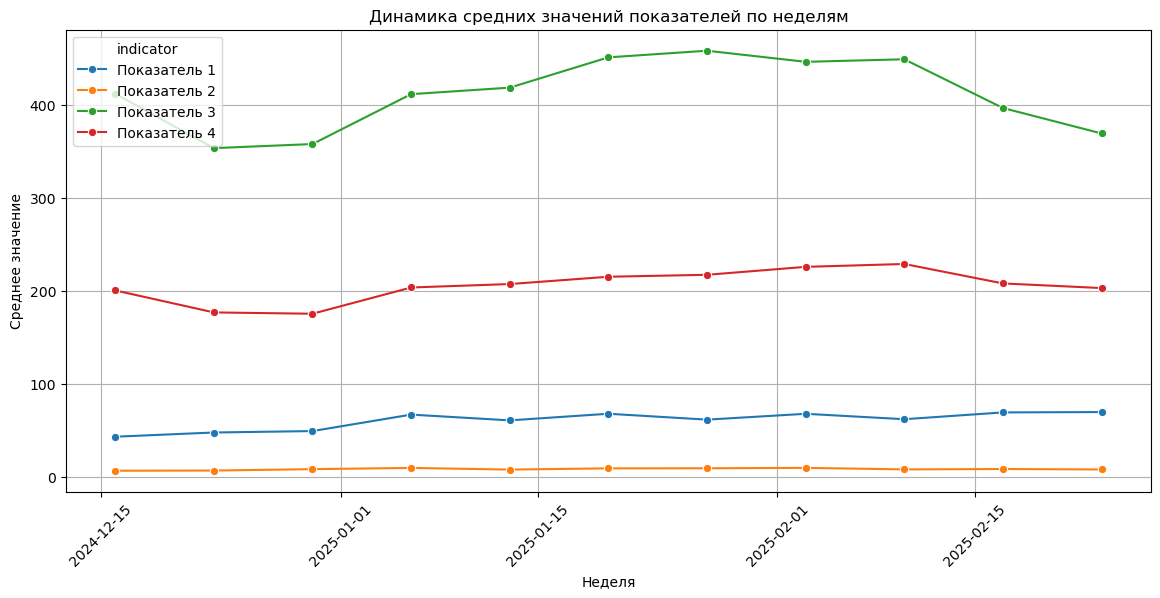

In [37]:
plt.figure(figsize=(14,6))
sns.lineplot(
    data=weekly_trends,
    x='week_start',
    y='mean_value',
    hue='indicator',
    marker='o'
)
plt.title('Динамика средних значений показателей по неделям')
plt.xlabel('Неделя')
plt.ylabel('Среднее значение')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#  Визуализация данных - построение графиков, которые помогут найти полезные инсайты в данных и выявить общие тренды и динамику

## Boxplot по отделам и показателям
Поможет понять, как распределены значения внутри отделов и где есть выбросы, где отделы стабильно работают, а где — нестабильно

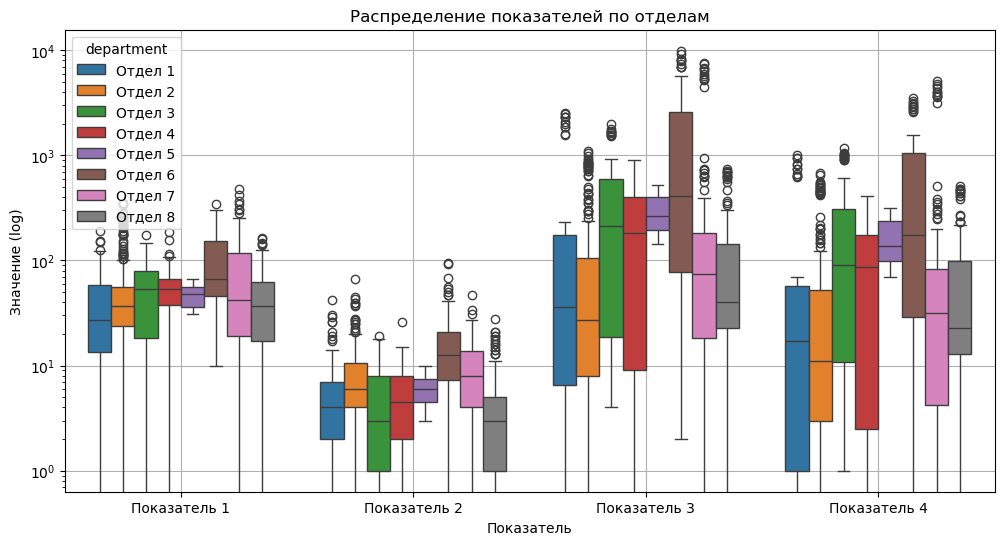

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_long,
    x='indicator',
    y='value',
    hue='department'
)
plt.title('Распределение показателей по отделам')
plt.xlabel('Показатель')
plt.ylabel('Значение (log)')
plt.yscale('log')
plt.grid(True)
plt.show()

## Парные зависимости показателей
Посмотрим, есть ли линейные зависимости между показателями

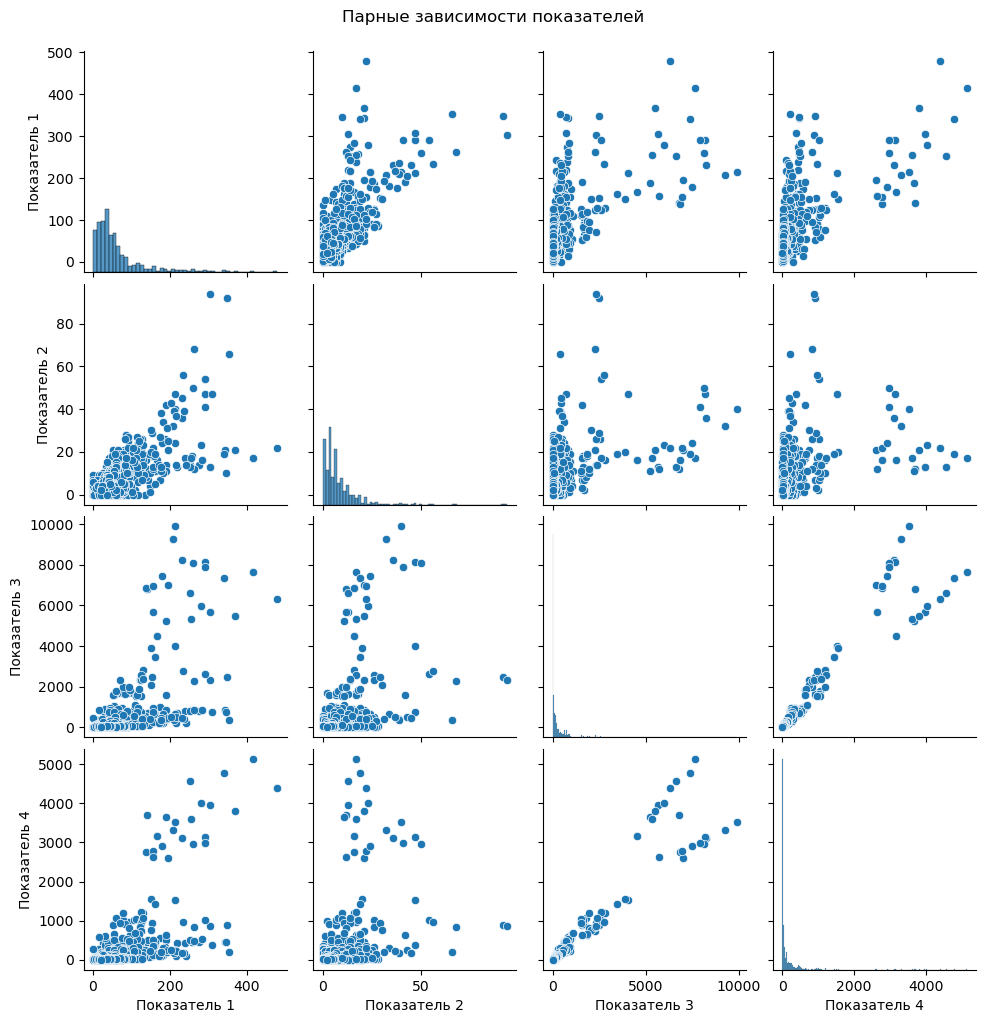

In [42]:
sns.pairplot(df_pivot[['Показатель 1', 'Показатель 2', 'Показатель 3', 'Показатель 4']])
plt.suptitle('Парные зависимости показателей', y=1.02)
plt.show()

## Сравнение отделов по средним значениям показателей
Покажет, какой отдел сильнее по каждому показателю

In [44]:
dept_means = df_long.groupby(['department', 'indicator']).agg(
    mean_value=('value', 'mean')
).reset_index()

dept_means.head()

,department,indicator,mean_value
0,Отдел 1,Показатель 1,44.345455
1,Отдел 1,Показатель 2,7.400000
2,Отдел 1,Показатель 3,458.054545
3,Отдел 1,Показатель 4,169.072727
4,Отдел 2,Показатель 1,57.312727


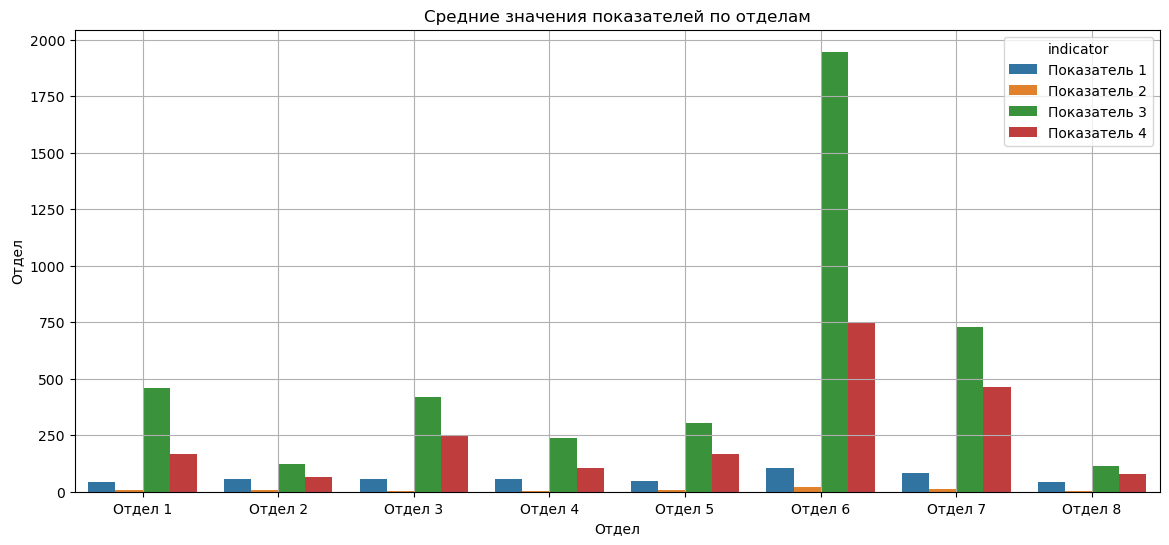

In [45]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=dept_means,
    x='department',
    y='mean_value',
    hue='indicator'
)
plt.title('Средние значения показателей по отделам')
plt.xlabel('Отдел')
plt.ylabel('Отдел')
plt.grid(True)
plt.show()

## Тепловая карта динамики по неделям

In [47]:
heatmap_data = df_long.pivot_table(
    index='indicator',
    columns='week_start',
    values='value',
    aggfunc='mean'
)
heatmap_data.columns = heatmap_data.columns.strftime('%d-%m-%y')


heatmap_data.head()

week_start,16-12-24,23-12-24,30-12-24,06-01-25,13-01-25,20-01-25,27-01-25,03-02-25,10-02-25,17-02-25,24-02-25
indicator,,,,,,,,,,,
Показатель 1,42.860000,47.380000,48.926667,66.646667,60.433333,67.566667,61.226667,67.520000,61.680000,69.000000,69.386667
Показатель 2,6.246667,6.433333,7.940000,9.266667,7.480000,8.800000,8.880000,9.320000,7.666667,8.066667,7.613333
Показатель 3,411.913333,353.440000,357.840000,411.546667,418.533333,451.146667,458.280000,446.333333,449.080000,396.626667,369.240000
Показатель 4,200.320000,176.626667,175.200000,203.453333,207.160000,215.026667,217.120000,225.666667,228.746667,207.826667,202.853333


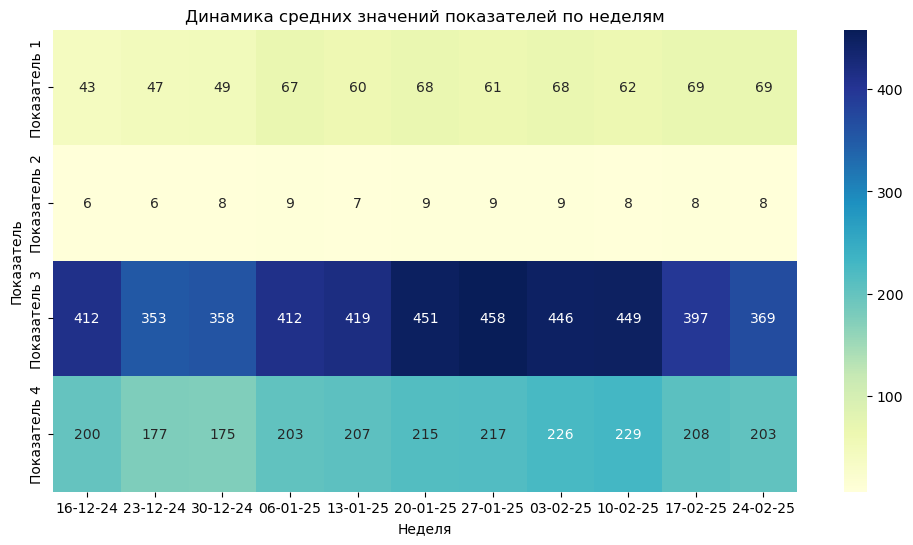

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap='YlGnBu'
)
plt.title('Динамика средних значений показателей по неделям')
plt.xlabel('Неделя')
plt.ylabel('Показатель')
plt.show()

## Сохраним наши данные в формате CSV для формирования отчёта в Power BI

In [85]:
# Основная таблица
df_long.to_csv('D:/Файлы_для_Anacond/main_data.csv', index=False)

# Динамика по неделям
weekly_trends.to_csv('D:/Файлы_для_Anacond/weekly_trends.csv', index=False)

In [89]:
dept_means = df_long.groupby(['department', 'indicator']).agg(
    mean_value=('value', 'mean')
).reset_index()

dept_means.to_csv('D:/Файлы_для_Anacond/dept_means.csv', index=False)